# Introduction to Data Analasys
## Final Project
##### Presenters:
Roi Maskalik, 212234637 <br>
Dvir Twito, 324270883

### Part 1: Choosing The Dataset

#### A
We chose the adult income dataset.<p>
#### B

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_df = pd.read_csv("adult.csv")

#### C
In this part, we used the dtypes attribute of the dataframe, in order to get a list of the features alongside their type.
<p>Note: every object type is a string.

In [47]:
print('The features of the dataset and their types:')
print(project_df.dtypes)

The features of the dataset and their types:
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


**We will remove the colummns: 'fnlwgt', 'education', 'capital-gain', 'capital-loss'<br>
The details for our reasons will be provided on the pdf**

In [48]:
project_df = project_df.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1)
print('New features of the dataset and their types:')
print(project_df.dtypes)

New features of the dataset and their types:
age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
income             object
dtype: object


#### D
In this part, we used the shape attribute of the dataframe, in order to get the number of records in the dataframe.

In [49]:
number_of_records = project_df.shape[0]
print(f"The number of records in the dataset is: {number_of_records}")

The number of records in the dataset is: 48842


### Part 2: Exploratory Data Analysis

#### A

##### Gender distribution

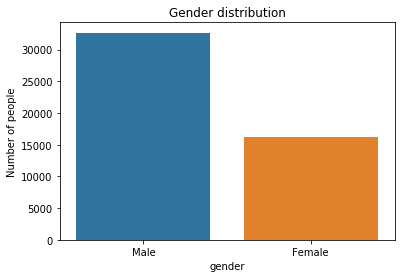

In [50]:
# Visualize the distribution
gender_plot = sns.countplot(data=project_df, x='gender')

# Set the title and the Y axis label
gender_plot.set(ylabel='Number of people', title='Gender distribution')

# Clear the output and show the plot
plt.show()

##### Race distribution

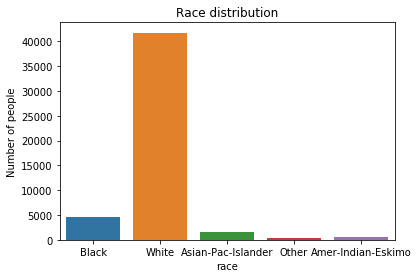

In [51]:
# Visualize the distribution
race_plot = sns.countplot(data=project_df, x='race')

# Set the title and the Y axis label
race_plot.set(ylabel='Number of people', title='Race distribution')

# Clear the output and show the plot
plt.show()

##### Age distribution

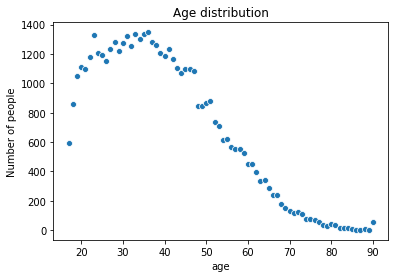

In [52]:
# Gropu the data by age
df_gb_age = project_df.groupby('age', as_index=False)
age_sizes = df_gb_age.size()

# Visualize the results
age_plot = sns.scatterplot(age_sizes.index, age_sizes)

# Set the title and the Y axis label
age_plot.set(ylabel='Number of people', title='Age distribution')

# Clear the output and show the plot
plt.show()

##### Income distribution

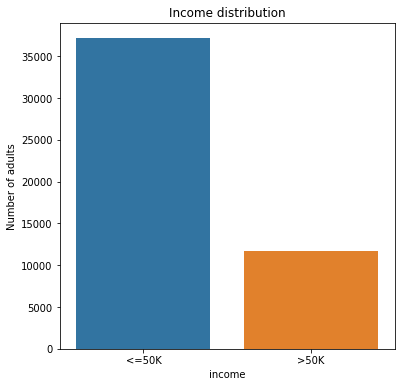

In [53]:
# Visualize the distribution
income_count_plot = sns.countplot(data = project_df, x = 'income')

# Set the title
income_count_plot.set_title('Income distribution')

# Set the y label
income_count_plot.set(ylabel = 'Number of adults')

# Set the size of the figure
income_count_plot.figure.set_size_inches(6, 6)

# Clear the output and show the plot
plt.show()

##### Educational years distribution

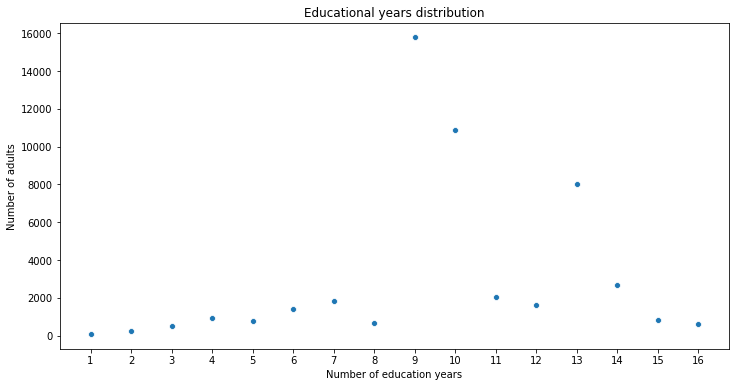

In [54]:
# Group our dataframe by number of education years and calculate the number of adults in each number
education_groupby = project_df.groupby('educational-num', as_index = False)
education_groupby_df = education_groupby.size().reset_index()

# Set the minimum and maximum for the xticks
min_years_of_education = education_groupby_df['educational-num'].min()
max_years_of_education = education_groupby_df['educational-num'].max()

# Visualize the results and set labels, title, ticks and size 
education_years_count_plot = sns.scatterplot(data = education_groupby_df, x = 'educational-num', y = 0)

# Set the title, the axes lables and set the x ticks
education_years_count_plot.set_title("Educational years distribution")
education_years_count_plot.set(ylabel = 'Number of adults', xlabel = "Number of education years")
plt.xticks(np.arange(min_years_of_education, max_years_of_education + 1))

# Set the size of the plot
education_years_count_plot.figure.set_size_inches(12,6)

# Clear the output and show the plot
plt.show()

#### B

##### Educational years distribution

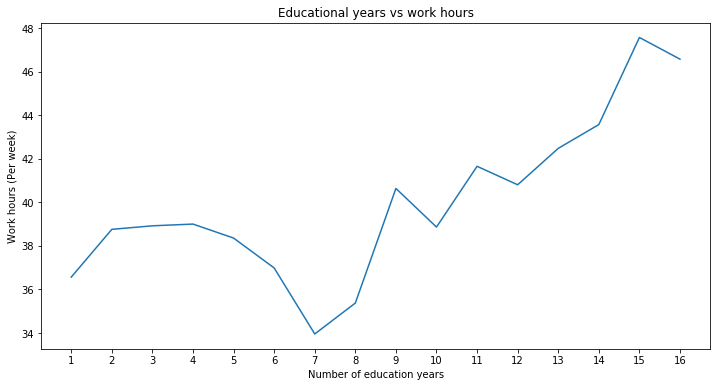

In [15]:
# Calculate the number of adults in each number
years_education_vs_work_hours_df = education_groupby.agg({'hours-per-week': 'mean'})
years_education_vs_work_hours_df

# Visualize the results
years_education_vs_work_hours_plot = sns.lineplot(data = years_education_vs_work_hours_df, x = 'educational-num', y = 'hours-per-week')

# Set the title, the axes lables and set the x ticks
years_education_vs_work_hours_plot.set_title("Educational years vs work hours")
years_education_vs_work_hours_plot.set(ylabel = 'Work hours (Per week)', xlabel = "Number of education years")
plt.xticks(np.arange(min_years_of_education, max_years_of_education + 1))

# Set the size of the plot
years_education_vs_work_hours_plot.figure.set_size_inches(12,6)

# Clear the output and show the plot
plt.show()

In [19]:
# Present the correlation between the variables
years_education_work_hours_correlation = (years_education_vs_work_hours_df['hours-per-week'].
corr(years_education_vs_work_hours_df['educational-num'], method = 'spearman'))
print(f"The spearman correlation between years of education and work hours per week is: {years_education_work_hours_correlation}")

The spearman correlation between years of education and work hours per week is: 0.7647058823529411


We can see that there is a relatively strong positive correlation between years of education and work hours per week

### Part 3: Estimation And Hypothesis Testing

In [20]:
# Explore the data in order to form a question for the hypothesis testing
probability_income_above_50k = project_df[project_df['income'] == '>50K'].shape[0] / project_df.shape[0]

probability_female = project_df[project_df['gender'] == 'Female'].shape[0] / project_df.shape[0]

female_with_income_above_50k_filter = (project_df['gender'] == 'Female') & (project_df['income'] == '>50K')
probability_female_income_above_50k = project_df[female_with_income_above_50k_filter].shape[0] / project_df.shape[0]

print(f" The precentage of adults in our dataset that have an income higher than 50k is: {probability_income_above_50k * 100}%\n",
       f"The precentage of female adults in our dataset: {probability_female * 100}%\n",
       f"The precentage of female adults in our dataset that have an income higher than 50k is: {probability_female_income_above_50k * 100}%")

 The precentage of adults in our dataset that have an income higher than 50k is: 23.928176569346054%
 The precentage of female adults in our dataset: 33.151795585766344%
 The precentage of female adults in our dataset that have an income higher than 50k is: 3.621882805781909%


We would expect to have around 7% of female adults that have an income higher than 50k based on the ratios<br>
The issue begs the question: **Is there a discrimination against female adults?**

The question is interesting for us because in the past years, a lot of effort was made in order to correct the inequality of the genders
    
We will perform simulations according to the assumption of our model: 23.9% of adults have an income higher than 50k. <br>
Then, we will check if our test statistic from our observed data is consistent with the distribution of the statistic from our model.
    

in order to make the calculations easier we will created a new column: **binary_income**, <br>
that will be 1 if the respective income is '>50k' and 0 if it's '<=50k'<br>
The mean of the column **binary_income** will be the probability to choose an adult with an income higher than 50k from our dataset

In [60]:
# Add to thedataset a column named 'binary_income'
project_df['binary_income'] = project_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

**Null hypothesis -** The distribution between females and males that recieve an income higher than 50k is the same<br>
**Alternative hypothesis-**  The distribution between females and males that recieve an income higher than 50k is not the same <br>
**Test statistic-**  difference between the precantage of females that have an income higher than 50k and the precentage of males that have a income higher than 50k 

In [23]:
def differences_in_means(sample, column_name, grouping_var):
    '''
    Calculates the difference in the means of binary outcomes between males and females
    '''
    group_by_variable = sample.groupby(grouping_var)
    amount = group_by_variable[column_name].mean()
    return amount[1] - amount[0]

In [24]:
def bootstrap_difference_in_incomes(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    bootstrap_difference_means = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True)
        bootstrap_difference_means[i] = differences_in_means(bootstrap_sample, column_name, grouping_var)
    return bootstrap_difference_means

In [25]:
# Perform bootstrap
num_simulations = 10000
bootstrap_difference_means = bootstrap_difference_in_incomes(project_df, 'binary_income', 'gender', num_simulations)

lower value: 0.1875033673622316
upper value: 0.20152857165783117


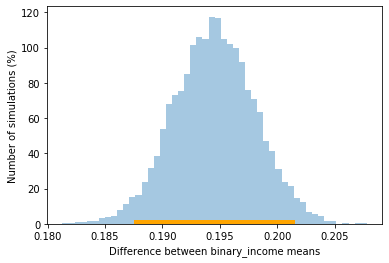

In [26]:
# Visualize the results
difference_incomes_between_genders_plot = sns.distplot(bootstrap_difference_means, kde=False, norm_hist=True)

# Set the title and the axes lables
difference_incomes_between_genders_plot.set(xlabel='Difference between binary_income means', ylabel= 'Number of simulations (%)')

# Calculate the bounds of the interval, print them, and add the interval to the plot
left_end = np.percentile(bootstrap_difference_means, 2.5, interpolation='higher')
right_end =  np.percentile(bootstrap_difference_means, 97.5, interpolation='higher')
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=8)  
print(f"lower value: {left_end}")
print(f"upper value: {right_end}")


# Clear the output and show the plot
plt.show()

Zero is not included in the 95% CI for the difference between the means.
    
Therefore we reject the null hypothesis and conclude at the 95% confidence level that the there is a difference between the precantage of females that have an income higher than 50k and the precentage of males that have a income higher than 50k: <br>

In [28]:
print(f'The interval lies between {left_end * 100}% and {right_end * 100}% in favor of the males')

The interval lies between 18.75033673622316% and 20.152857165783118% in favor of the males


### Part 4: Prediction - Classification

We started by cleaning the data. We removed the rows which contains '?', beacause this is a corrupted data, that interrupt us in the classification process.<p>
After that, we performed hot encoding for the categorial attributes, in order to use them in the classification process.

In [77]:
# Cleaning the data
clean_df = project_df[(project_df.astype(str) != '?').all(axis=1)]  # Remove rows with ?


# Perform hot encoding
variables_to_encode = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
encoded_df = pd.get_dummies(clean_df, columns=variables_to_encode, prefix=variables_to_encode)

# Remove income from encoded_df (because it's a categorial attribute)
encoded_df = encoded_df.drop(['income'], axis=1)
encoded_df.head()

,age,educational-num,hours-per-week,binary_income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
from sklearn import preprocessing
encoded_df_columns = encoded_df.columns
scaler = preprocessing.MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(encoded_df)
scaled_encoded_df = pd.DataFrame(scaled_np_matrix, columns=encoded_df_columns)
scaled_encoded_df.head()

,age,educational-num,hours-per-week,binary_income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.400000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.397959,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.333333,0.295918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
